<a href="https://colab.research.google.com/github/SadeemAlasiri/Practice/blob/main/used_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive#ربط مع قوقل
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np


In [212]:
df=pd.read_csv('/content/Used_Cars.csv')

# get info of the set data and display it

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [175]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [176]:
df.head(4)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [177]:
df.tail(3)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [178]:
df.sample(8)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3236,3236,Mercedes-Benz E-Class 2009-2013 E250 CDI Avant...,Delhi,2011,70000,Diesel,Automatic,First,14.21 kmpl,2143 CC,203 bhp,5.0,NaN,13.00
5544,5544,Hyundai Creta 1.6 CRDi SX Option,Mumbai,2015,47250,Diesel,Manual,Second,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,11.00
5954,5954,Toyota Fortuner 4x4 AT,Chennai,2015,95000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,NaN,19.60
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
1586,1586,Hyundai EON Era,Coimbatore,2013,65060,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,3.32
4113,4113,Hyundai Verna 1.6 SX VTVT,Bangalore,2014,45000,Petrol,Manual,Second,17.01 kmpl,1591 CC,121.3 bhp,5.0,NaN,6.75
2060,2060,Audi A4 2.0 TDI 177 Bhp Technology Edition,Bangalore,2014,24000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.00
2485,2485,Maruti Vitara Brezza ZDi Plus Dual Tone,Kochi,2017,45362,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,11.75 Lakh,9.38


In [179]:
df['Year'].max()

2019

In [180]:
df['Unnamed: 0']

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [213]:
df.drop(columns='Unnamed: 0',inplace=True)

In [214]:
df.drop(columns='New_Price',inplace=True)

In [183]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [184]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [185]:
df.query('Kilometers_Driven >=5000')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [186]:
df.query('Year>=2019').head(6)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67
135,Hyundai Verna VTVT 1.6 AT SX Plus,Kochi,2019,12645,Petrol,Automatic,First,17.0 kmpl,1591 CC,121.3 bhp,5.0,11.50
155,Hyundai EON Magna Plus,Kochi,2019,14322,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,4.23
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,6.50
235,Toyota Innova Crysta 2.8 GX AT,Kochi,2019,14165,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,19.64
357,Skoda Superb L&K 1.8 TSI AT,Kochi,2019,13747,Petrol,Automatic,First,14.67 kmpl,1798 CC,177.46 bhp,5.0,27.30


In [151]:
df['Price'].max()

160.0

In [188]:
#df['New_Price']# drop!

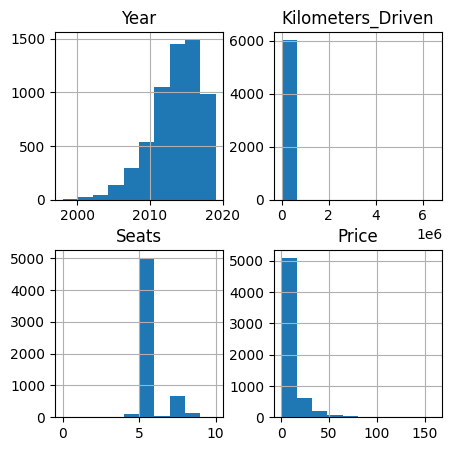

In [153]:
df.hist(bins=10,figsize=(5,5));# display the numbrical type of the year and the kilo , seats price

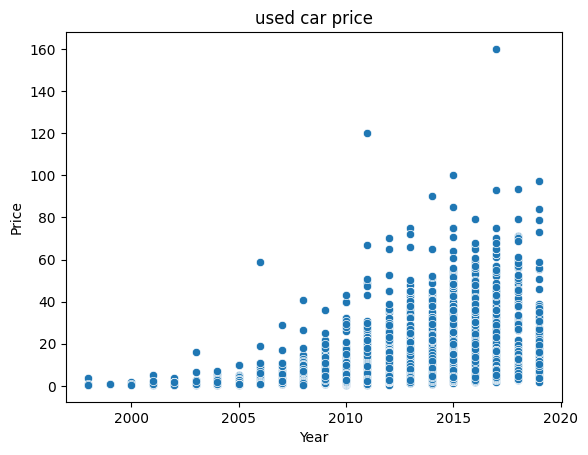

In [154]:
sns.scatterplot(x='Year',y='Price',data=df);

plt.title('used car price');

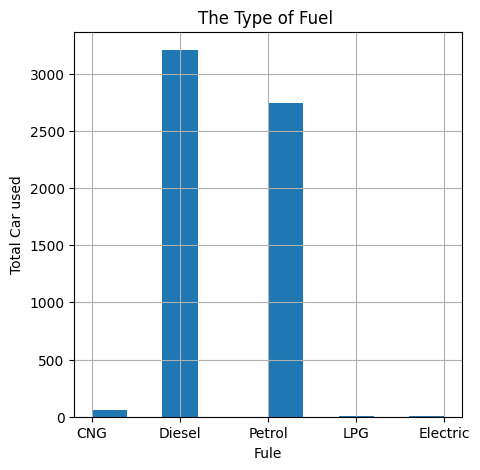

In [155]:
df['Fuel_Type'].hist(bins=10,figsize=(5,5));
plt.title('The Type of Fuel ')
plt.xlabel('Fule')
plt.ylabel('Total Car used');

In [189]:
df.duplicated().sum()# ther is no duplicated

0

In [215]:
df.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36


In [233]:
df = df.dropna()# importint

In [262]:
x=df.drop(columns='Price')# هنا حددت الاكس حثتي الي يسوي عليها العمليات
y=df[['Price']]# حددت الواي عشان اجرب و اختبر على الاكس

In [263]:
x

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0


In [264]:
y

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74
...,...
6014,4.75
6015,4.00
6016,2.90
6017,2.65


In [265]:
# الtrin and test spilt

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [236]:
# test the train only

x_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1890,Honda Jazz 1.2 S i VTEC,Kolkata,2016,21771,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0
2859,Renault KWID Climber 1.0 MT,Hyderabad,2018,4126,Petrol,Manual,First,21.7 kmpl,999 CC,67 bhp,5.0
4127,Mercedes-Benz B Class B180,Delhi,2013,28000,Petrol,Automatic,First,14.8 kmpl,1595 CC,120.7 bhp,5.0
1178,Volvo XC60 D5 Inscription,Kochi,2014,86925,Diesel,Automatic,First,11.2 kmpl,2400 CC,215 bhp,5.0
3382,Mercedes-Benz R-Class R350 CDI 4MATIC,Hyderabad,2010,46000,Diesel,Automatic,First,11.8 kmpl,2987 CC,261 bhp,7.0
...,...,...,...,...,...,...,...,...,...,...,...
3799,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Delhi,2014,30000,Diesel,Automatic,First,14.21 kmpl,2143 CC,203 bhp,5.0
5233,Maruti Ritz VDI (ABS) BS IV,Hyderabad,2015,75000,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0
5268,Hyundai i20 Asta,Mumbai,2009,28000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0
5433,Hyundai i10 Era,Kochi,2016,34952,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0


In [237]:
y_train

,Price
1890,4.95
2859,4.80
4127,11.56
1178,17.18
3382,28.00
...,...
3799,26.00
5233,4.90
5268,2.65
5433,4.01


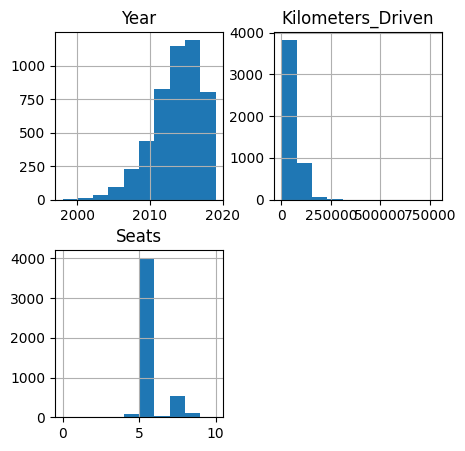

In [238]:
x_train.hist(bins=10,figsize=(5,5));# اسالي الاستاذ في التسيت هل اسوي لها او لا

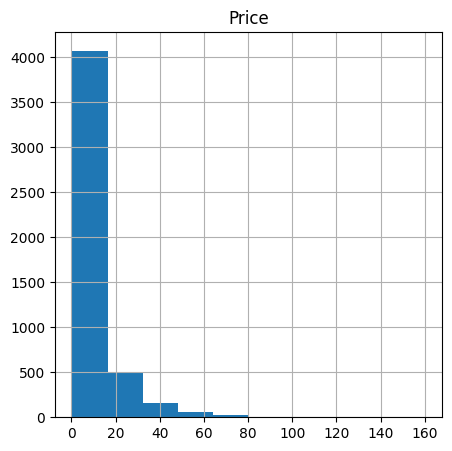

In [197]:
y_train.hist(figsize=(5,5),bins=10);

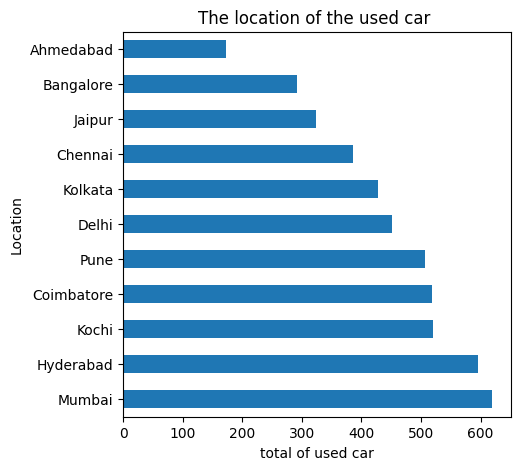

In [198]:
x_train['Location'].value_counts().plot(kind='barh',figsize=(5,5));# انتبهي للسبلينق
plt.title('The location of the used car ')
plt.xlabel('total of used car');

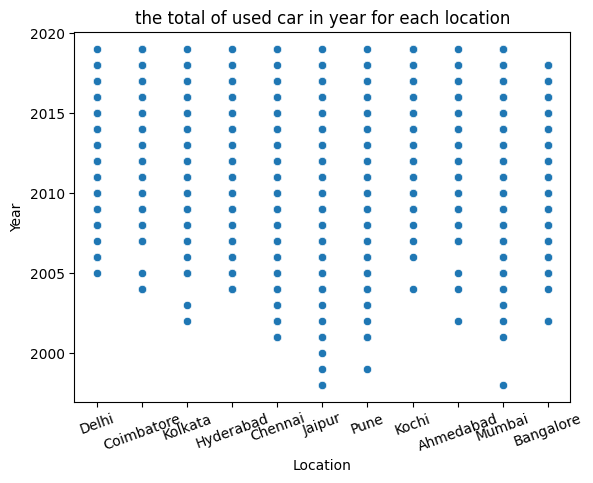

In [104]:
sns.scatterplot(x='Location',y='Year',data=x_train);
plt.xticks(rotation=20);
plt.title('the total of used car in year for each location');

In [164]:
x_train['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [106]:
x_train['Owner_Type'].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [240]:
x_train['Location'].value_counts()

,count
Location,
Mumbai,634
Hyderabad,581
Kochi,522
Coimbatore,521
Pune,483
Delhi,454
Kolkata,428
Chennai,390
Jaipur,317


In [266]:
x_train.isna().sum()# shold handling the nall

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


In [207]:
#x_train.dropna(inplace=True)# حذفنا النل

In [242]:
y_train.isna().sum()# has no nall in y

,0
Price,0


In [243]:
y_train


,Price
1890,4.95
2859,4.80
4127,11.56
1178,17.18
3382,28.00
...,...
3799,26.00
5233,4.90
5268,2.65
5433,4.01


In [244]:
x_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1890,Honda Jazz 1.2 S i VTEC,Kolkata,2016,21771,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0
2859,Renault KWID Climber 1.0 MT,Hyderabad,2018,4126,Petrol,Manual,First,21.7 kmpl,999 CC,67 bhp,5.0
4127,Mercedes-Benz B Class B180,Delhi,2013,28000,Petrol,Automatic,First,14.8 kmpl,1595 CC,120.7 bhp,5.0
1178,Volvo XC60 D5 Inscription,Kochi,2014,86925,Diesel,Automatic,First,11.2 kmpl,2400 CC,215 bhp,5.0
3382,Mercedes-Benz R-Class R350 CDI 4MATIC,Hyderabad,2010,46000,Diesel,Automatic,First,11.8 kmpl,2987 CC,261 bhp,7.0
...,...,...,...,...,...,...,...,...,...,...,...
3799,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Delhi,2014,30000,Diesel,Automatic,First,14.21 kmpl,2143 CC,203 bhp,5.0
5233,Maruti Ritz VDI (ABS) BS IV,Hyderabad,2015,75000,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0
5268,Hyundai i20 Asta,Mumbai,2009,28000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0
5433,Hyundai i10 Era,Kochi,2016,34952,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0


In [227]:
# اول خطوه قبل الامبوتر
num_data = df.select_dtypes(np.number)
# هنا اقول له اقراء البيانات بشكل ارقام اول شىء


In [225]:
# imput the nall
from sklearn.impute import SimpleImputer
imputr=SimpleImputer(strategy="median")
imputr.fit(num_data)


SimpleImputer(strategy='median')

In [226]:
x_train.isna().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,1
Engine,31
Power,31


In [205]:
x_train.describe()

,Year,Kilometers_Driven,Seats
count,4815.000000,4815.000000,4780.000000
mean,2013.395846,57424.396677,5.277615
std,3.255098,37523.596127,0.808850
min,1998.000000,171.000000,0.000000
25%,2012.000000,34000.000000,5.000000
50%,2014.000000,52827.000000,5.000000
75%,2016.000000,72167.000000,5.000000
max,2019.000000,775000.000000,10.000000


from sklearn.impute import  KNNImputer #فهم تحط الرقم القريم للقيم #
imputer = KNNImputer()# اعبي الداتا بالمين الى هنا
imputer.fit(num_data)#
num_data=imputer.transform(num_data)#

In [206]:
#futrt Engneer
# اول شىء بحول الكلام ارقام
df.corr(numeric_only=True)#لو ما حطيت الي داخل رح يطلع ايرور لانه يفهم ارقام
#sns.heatmap(df.corr(numeric_only=True));

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173048,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493
Seats,0.012333,0.083113,1.000000,0.052225
Price,0.305327,-0.011493,0.052225,1.000000


In [122]:
df['New_price_car']=df['Kilometers_Driven']/df['Price']

In [123]:
df['New_price_car']

,New_price_car
0,41142.857143
1,3280.000000
2,10222.222222
3,14500.000000
4,2292.559188
5,31914.893617
6,24856.857143
7,2057.142857
8,12390.384615
9,33811.282051


Text(0.5, 0, 'New_price_car')

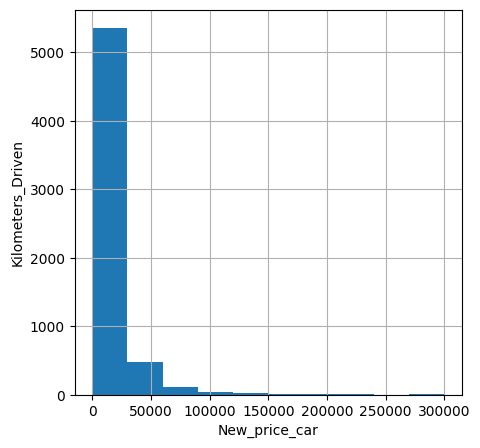

In [124]:
df['New_price_car'].hist(bins=10,figsize=(5,5));
plt.ylabel('Kilometers_Driven')
plt.xlabel('New_price_car')

In [125]:
x_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,New_price_car
2534,Maruti Vitara Brezza ZDi,Kolkata,2018,2900,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,10.13 Lakh,331.428571
2860,Tata Bolt Quadrajet XM,Hyderabad,2017,98500,Diesel,Manual,First,22.95 kmpl,1248 CC,74 bhp,5.0,7.97 Lakh,16416.666667
1773,Honda WRV i-VTEC VX,Kochi,2018,15135,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,10.57 Lakh,1629.171152
4318,Toyota Innova Crysta 2.8 ZX AT,Ahmedabad,2016,42388,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,24.63 Lakh,2354.888889
2879,Audi A6 35 TDI Matrix,Hyderabad,2014,62000,Diesel,Automatic,First,18.53 kmpl,1968 CC,187.74 bhp,5.0,67.1 Lakh,2480.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Hyundai Grand i10 1.2 Kappa Sportz AT,Coimbatore,2018,20667,Petrol,Automatic,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,8.63 Lakh,2737.350993
2041,Mahindra Bolero SLE,Hyderabad,2012,75000,Diesel,Manual,First,15.96 kmpl,2523 CC,62.1 bhp,7.0,10.32 Lakh,17441.860465
2061,Jeep Compass 2.0 Longitude,Coimbatore,2018,33218,Diesel,Manual,First,17.1 kmpl,1956 CC,170 bhp,5.0,22.46 Lakh,1743.727034
5393,Hyundai Grand i10 1.2 Kappa Magna,Pune,2010,45252,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,6.8 Lakh,20112.000000


In [126]:
y_test

,Price
2868,5.75
5924,10.08
3764,7.85
4144,2.40
2780,1.60
...,...
5926,0.55
4216,4.65
1351,6.93
4603,5.38


In [245]:
# handl the ordenar Oner type
OwnerType=df[['Owner_Type']]
OwnerType

,Owner_Type
0,First
1,First
2,First
3,First
4,Second
...,...
6014,First
6015,First
6016,Second
6017,First


In [246]:
# scaling and encoding
from sklearn.pipeline import make_pipeline# ختصار في عملياتين # المفروض واحد امبيوت و الثاني اسكيلر و كمان اين كود # الخطوه الثانيه لحذف النل و تقريب الاعداد
from sklearn.preprocessing import StandardScaler# بين الواحد و الصفر حساب العمليه
from sklearn.preprocessing import OrdinalEncoder#احول الكلام ارقام #هنا اوردير عشان الونر تايب افضل

scaler_num=make_pipeline(StandardScaler())
ordinal_cat=make_pipeline(OrdinalEncoder())

In [247]:
scaler_num.fit(num_data)

Pipeline(steps=[('standardscaler', StandardScaler())])

In [248]:
scaler_num.transform(num_data)

array([[-1.02713851,  0.14531489, -0.34464001, -0.69093384],
       [ 0.50216112, -0.19436922, -0.34464001,  0.27000402],
       [-0.72127858, -0.13958146, -0.34464001, -0.44511253],
       ...,
       [-0.41541866, -0.0409635 ,  3.36468773, -0.58813584],
       [-0.10955873, -0.13958146, -0.34464001, -0.61048323],
       [-0.72127858, -0.12862391, -0.34464001, -0.62389166]])

In [249]:
ordinal_cat.fit_transform(OwnerType)

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [0.],
       [0.]])

In [250]:
x_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
1890,Honda Jazz 1.2 S i VTEC,Kolkata,2016,21771,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0
2859,Renault KWID Climber 1.0 MT,Hyderabad,2018,4126,Petrol,Manual,First,21.7 kmpl,999 CC,67 bhp,5.0
4127,Mercedes-Benz B Class B180,Delhi,2013,28000,Petrol,Automatic,First,14.8 kmpl,1595 CC,120.7 bhp,5.0
1178,Volvo XC60 D5 Inscription,Kochi,2014,86925,Diesel,Automatic,First,11.2 kmpl,2400 CC,215 bhp,5.0
3382,Mercedes-Benz R-Class R350 CDI 4MATIC,Hyderabad,2010,46000,Diesel,Automatic,First,11.8 kmpl,2987 CC,261 bhp,7.0
...,...,...,...,...,...,...,...,...,...,...,...
3799,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Delhi,2014,30000,Diesel,Automatic,First,14.21 kmpl,2143 CC,203 bhp,5.0
5233,Maruti Ritz VDI (ABS) BS IV,Hyderabad,2015,75000,Diesel,Manual,First,23.2 kmpl,1248 CC,73.94 bhp,5.0
5268,Hyundai i20 Asta,Mumbai,2009,28000,Petrol,Manual,First,17.0 kmpl,1197 CC,80 bhp,5.0
5433,Hyundai i10 Era,Kochi,2016,34952,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0


In [251]:
y_train

,Price
1890,4.95
2859,4.80
4127,11.56
1178,17.18
3382,28.00
...,...
3799,26.00
5233,4.90
5268,2.65
5433,4.01


In [252]:
# colom transofor  # هنا رح يقوم بعمليات process  للارقام و الكلمات


from sklearn.compose import ColumnTransformer


Trans = ColumnTransformer([('num',scaler_num,['Kilometers_Driven','Year']),('cat',ordinal_cat,['Owner_Type'])])

#عرفنا متغير و حسبنا فيه جميع العمليات
# بعد ما اخلص من العمليه حقت الدمج اروح اسوي الترانسوف


In [253]:
x_trin_procc=Trans.fit_transform(x_train)# لازم احفظها في متغير عشان اعرف اسوي المودل

In [254]:
x_trin_procc

array([[-0.91956687,  0.79820424,  0.        ],
       [-1.37481447,  1.4168368 ,  0.        ],
       [-0.75885634, -0.12974459,  0.        ],
       ...,
       [-0.75885634, -1.3670097 ,  0.        ],
       [-0.57949214,  0.79820424,  0.        ],
       [ 1.15037134, -2.60427481,  0.        ]])

In [ ]:
#x_trin_procc=Trans.transform(x_train)#

In [ ]:
#x_trin_procc=Trans.fit_transform(x_train)

In [267]:
x_trin_procc.shape

(4780, 3)

In [268]:
y_train.shape

(4780, 1)

In [257]:
# creat the modal

from sklearn.linear_model import LinearRegression

lin=LinearRegression()
lin.fit(x_trin_procc,y_train)

LinearRegression()

In [258]:
lin.coef_#w

array([[-0.40439599,  3.40278866,  0.50982643]])

In [259]:
lin.intercept_#b+

array([9.37128625])

In [260]:
lin.score(x_trin_procc,y_train)

0.0989450611063466

In [270]:
per_y=lin.predict((x_trin_procc))
per_y

array([[12.45927575],
       [14.74845189],
       [ 9.23667129],
       ...,
       [ 5.02651962],
       [12.32175089],
       [ 0.04428392]])